# Data Storytelling
__Introduction__

In this part of my first capstone project, I will work on the output that I created after data wrangling process to explore, visualize, and create stories based on the visualizations. Before starting, I want to remind that I am working on predicting Airbnb new guest booking travel experience.The data was received from "Airbnb New User Bookings" competition on Kaggle website (https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings). After data wrangling process, I created an output both in Pickle and CSV formats. I will again start data storytelling process by loading required and optional libraries that I (might) want to use during my analyses. Then, I will call the output dataset to start analysis. There are some questions that I will be trying to get answers to through visualizations. Some other questions may arise later based on the findings. Here are some questions I want to explore:

1. What countries do users mostly want to travel to? 
2. What is the distribution of genders who are being active to book a stay?
3. What is the distribution of the age of the users?
4. What is the distribution of the language of the destination countries?
5. What device do users mostly use for booking?
5. What methods do users mostly use to signup for booking a stay?
7. What browser do users mostly prefer using for booking their stay?
8. What are the most common actions while booking?
9. What days of a week do users mostly become active for booking a stay?
10. What are the most common applications that users mostly use to signup based on destination countries? 
11. What is the most common signup method that users mostly use to signup based on destination countries? 
12. What is the relationship between users' ages and destination countries? 
13. What days of a week that users mostly prefer for booking based on destination countries?



__1__: __IMPORT LIBRARIES__

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', 50)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import sklearn.model_selection


c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, 
                cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, 
               s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, 
               alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, 
                     cdiscrete=cmap_bold, ccolor=cm, psize=10, alpha=0.1):
    ax,xx,yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=False, 
                           colorscale=colorscale, cdiscrete=cdiscrete, 
                           psize=psize, alpha=alpha, predicted=True) 
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
    cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14, axes=ax)
    return ax 

print("Loaded")

Loaded


__2__: __LOAD DATASET AND ASSIGN TO A DATAFRAME__

In [2]:
dfmergefinal = pd.read_csv("data/dfmergefinal.csv")

In [3]:
dfmergefinal.head()

,user_id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance,action,action_type,action_detail,device_type,secs_elapsed,age_bucket,population_in_thousands,year
0,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,NaN,NaN,NaN,NaN,NaN,NaN,lookup,NaN,NaN,Windows Desktop,319.0,NaN,NaN,NaN
1,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,NaN,NaN,NaN,NaN,NaN,NaN,search_results,click,view_search_results,Windows Desktop,67753.0,NaN,NaN,NaN
2,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,NaN,NaN,NaN,NaN,NaN,NaN,lookup,NaN,NaN,Windows Desktop,301.0,NaN,NaN,NaN
3,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,NaN,NaN,NaN,NaN,NaN,NaN,search_results,click,view_search_results,Windows Desktop,22141.0,NaN,NaN,NaN
4,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,NaN,NaN,NaN,NaN,NaN,NaN,lookup,NaN,NaN,Windows Desktop,435.0,NaN,NaN,NaN


In [4]:
dfmergefinal.shape

(3340486, 30)

In [5]:
dfmergefinal.country_destination.value_counts(dropna=False)

NDF      1833467
US       1013036
other     205497
FR         90282
IT         59932
ES         41473
GB         39540
CA         19006
DE         14512
NL         12830
AU          7434
PT          3477
Name: country_destination, dtype: int64

__Q1:__ __What countries do users mostly want to travel to?__

NDF      54.886235
US       30.326006
other     6.151710
FR        2.702661
IT        1.794110
ES        1.241526
GB        1.183660
CA        0.568959
DE        0.434428
NL        0.384076
AU        0.222542
PT        0.104087
Name: country_destination, dtype: float64


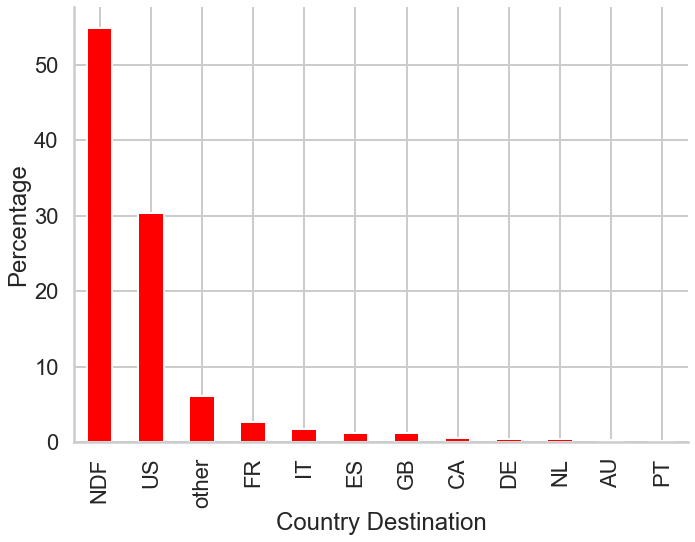

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
destination_percentage = dfmergefinal.country_destination.value_counts() / dfmergefinal.shape[0] * 100
destination_percentage.plot(kind='bar',color='red')
plt.xlabel('Country Destination')
plt.ylabel('Percentage')
sns.despine()
print(destination_percentage)

__INTERPRETATION:__ As seen in the table and bar graph above, about 55% of the users did not travel to anywhere while about 30% of the users travel to the U.S.

__Q2:__ __What is the distribution of genders who are being active to book a stay?__

NaN       47.222590
FEMALE    29.443530
MALE      23.225363
OTHER      0.108517
Name: gender, dtype: float64


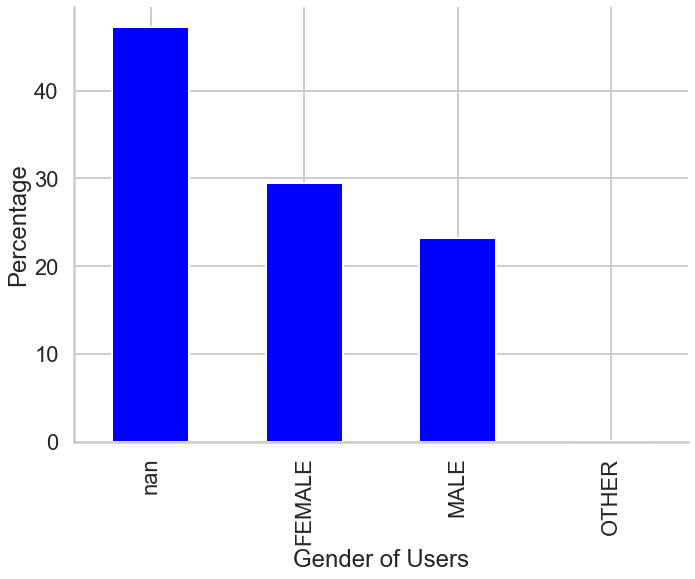

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
gender_percentage = dfmergefinal.gender.value_counts(dropna=False) / dfmergefinal.shape[0] * 100
gender_percentage.plot(kind='bar',color='blue')
plt.xlabel('Gender of Users')
plt.ylabel('Percentage')
print(gender_percentage)
sns.despine()

__INTERPRETATION:__ The percentage of NaN values is about 47%. In addition, while 29% of the users are female, 22% of them are male. 

__Q3:__ __What is the distribution of the age of the users?__

NaN      38.932898
27.0      3.350201
30.0      3.079582
28.0      3.068775
29.0      2.945679
26.0      2.936010
31.0      2.780344
25.0      2.776033
32.0      2.680478
33.0      2.502750
34.0      2.282303
24.0      2.187346
35.0      2.159087
23.0      1.948249
36.0      1.761241
22.0      1.545284
37.0      1.453681
38.0      1.418207
39.0      1.105827
40.0      1.008925
41.0      0.950341
42.0      0.939983
21.0      0.926003
43.0      0.891816
45.0      0.855834
44.0      0.847990
105.0     0.812636
46.0      0.762823
47.0      0.756686
51.0      0.642990
           ...    
79.0      0.014758
100.0     0.014669
101.0     0.014549
150.0     0.011855
108.0     0.011166
16.0      0.010597
95.0      0.010537
84.0      0.010448
102.0     0.009819
78.0      0.006676
85.0      0.006616
106.0     0.006466
86.0      0.005927
107.0     0.005418
96.0      0.004251
99.0      0.003802
90.0      0.003682
93.0      0.003622
83.0      0.003443
81.0      0.003143
91.0      0.003024
89.0      0.

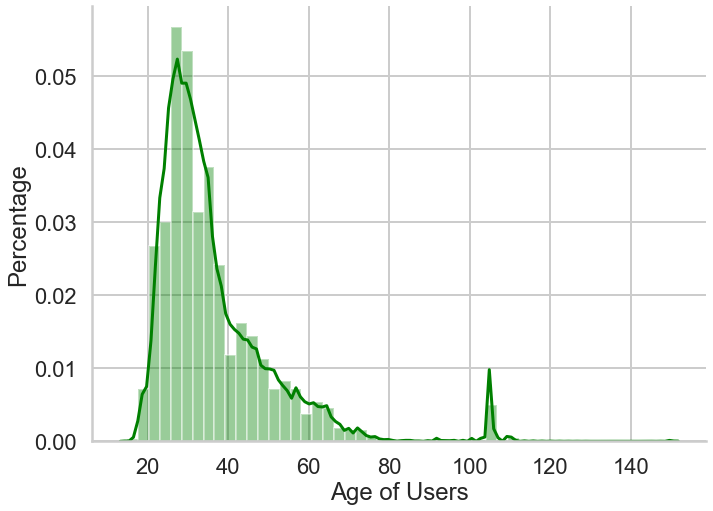

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
age_percentage = dfmergefinal.age.value_counts(dropna=False) / dfmergefinal.shape[0] * 100
sns.distplot(dfmergefinal.age.dropna(), color='green')
plt.xlabel('Age of Users')
plt.ylabel('Percentage')
sns.despine()
print(age_percentage)

__INTERPRETATION:__ Most of the users are between 20-40 years old. There are only a few users in the age of 80-100. Also, there are some users over 100 age but I believe those users might not want to enter their original ages. Furthermore, there are some values lower than 18 and I don't think Airbnb will allow them to book on their website. 

__Q4:__ __What is the distribution of the language of the destination countries?__

en    96.405673
zh     0.984468
ko     0.542855
fr     0.495796
es     0.429668
de     0.230206
it     0.205000
ru     0.190122
pt     0.176711
ja     0.121809
sv     0.046939
nl     0.036791
da     0.031612
fi     0.023739
pl     0.017932
tr     0.015058
cs     0.012813
el     0.012693
th     0.010268
id     0.006436
is     0.001886
no     0.000928
hu     0.000599
Name: language, dtype: float64


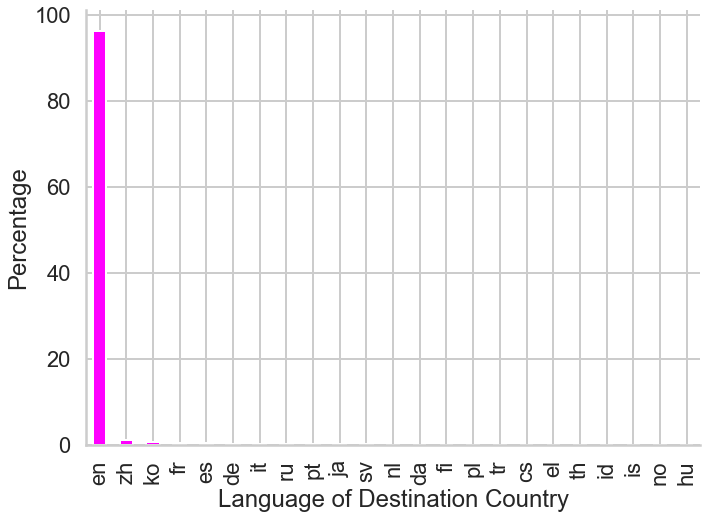

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
language_percentage = dfmergefinal.language.value_counts() / dfmergefinal.shape[0] * 100
language_percentage.plot(kind='bar',color='magenta')
plt.xlabel('Language of Destination Country')
plt.ylabel('Percentage')
print(language_percentage)
sns.despine()

__INTERPRETATION:__ Majority of users used English when they interacted on Airbnb website. This is not surprising because the desrination country of most of the users were U.S. 

__Q5:__ __What device do users mostly use for booking?__

Mac Desktop           41.706386
Windows Desktop       30.372796
iPhone                10.797770
Other/Unknown          7.556445
iPad                   7.068642
Android Phone          1.136691
Android Tablet         0.734594
Desktop (Other)        0.606109
SmartPhone (Other)     0.020566
Name: first_device_type, dtype: float64


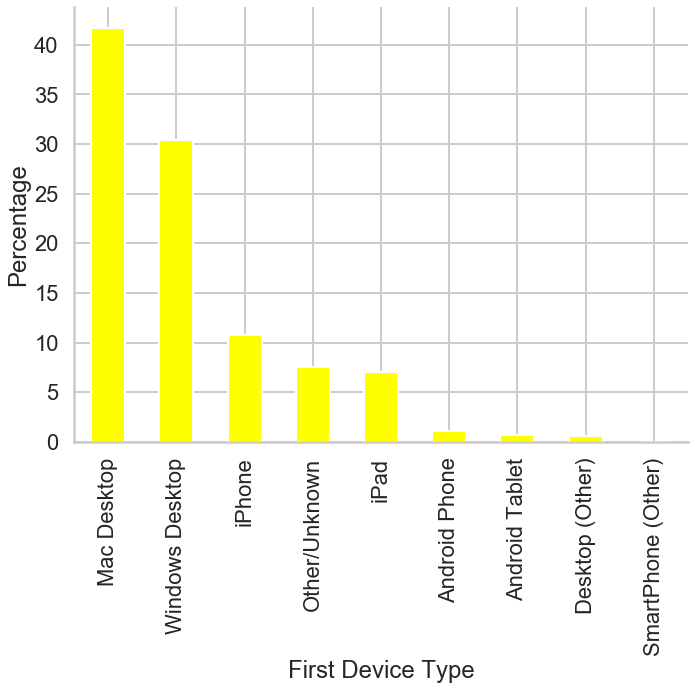

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
devicetype_percentage = dfmergefinal.first_device_type.value_counts() / dfmergefinal.shape[0] * 100
devicetype_percentage.plot(kind='bar',color='yellow')
plt.xlabel('First Device Type')
plt.ylabel('Percentage')
print(devicetype_percentage)
sns.despine()

__INTERPRETATION:__ About 42% of the users did their search and/or booking on a Mac Desktop while 30% of them used a Windows Desktop computer. In terms of smartphones, the users mostly used an iPhone (~11%).

__Q6:__ __What methods do users mostly use to signup for booking a stay?__

basic       76.650613
facebook    22.692057
google       0.657330
Name: signup_method, dtype: float64


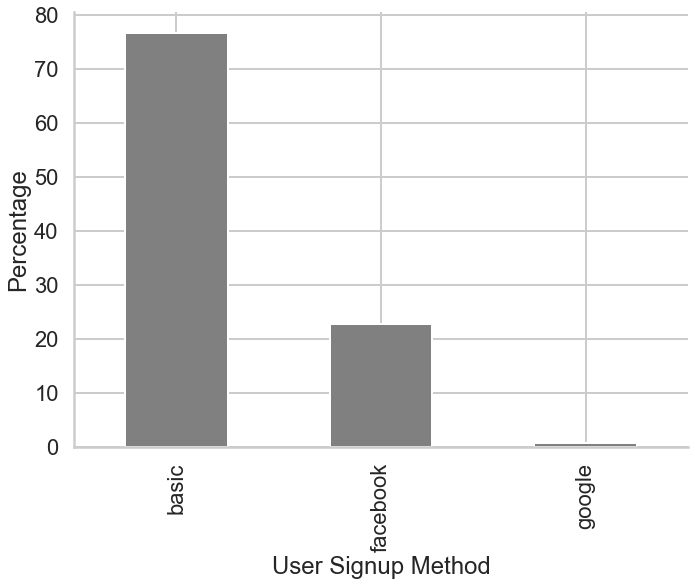

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
signup_method_percentage = dfmergefinal.signup_method.value_counts() / dfmergefinal.shape[0] * 100
signup_method_percentage.plot(kind='bar',color='grey')
plt.xlabel('User Signup Method')
plt.ylabel('Percentage')
print(signup_method_percentage)
sns.despine()

__INTERPRETATION:__ Majority of users signup through basic signup method while 22% of users prefer Facebook. 

__Q7:__ __What browser do users mostly prefer using for booking their stay?__

Chrome                30.632339
Safari                22.330104
Firefox               12.678634
Mobile Safari          8.398958
IE                     7.307320
Chrome Mobile          0.614611
Android Browser        0.251101
Silk                   0.089179
Opera                  0.088370
Chromium               0.036462
AOL Explorer           0.029756
Apple Mail             0.027721
Mobile Firefox         0.026194
Maxthon                0.018740
BlackBerry Browser     0.013441
Sogou Explorer         0.013441
SiteKiosk              0.010178
Yandex.Browser         0.009699
IceWeasel              0.007424
Iron                   0.005329
Opera Mini             0.004131
IE Mobile              0.004071
CoolNovo               0.003712
TenFourFox             0.001706
SeaMonkey              0.000928
Outlook 2007           0.000599
wOSBrowser             0.000479
Mozilla                0.000449
Googlebot              0.000359
Pale Moon              0.000359
Name: first_browser, dtype: float64


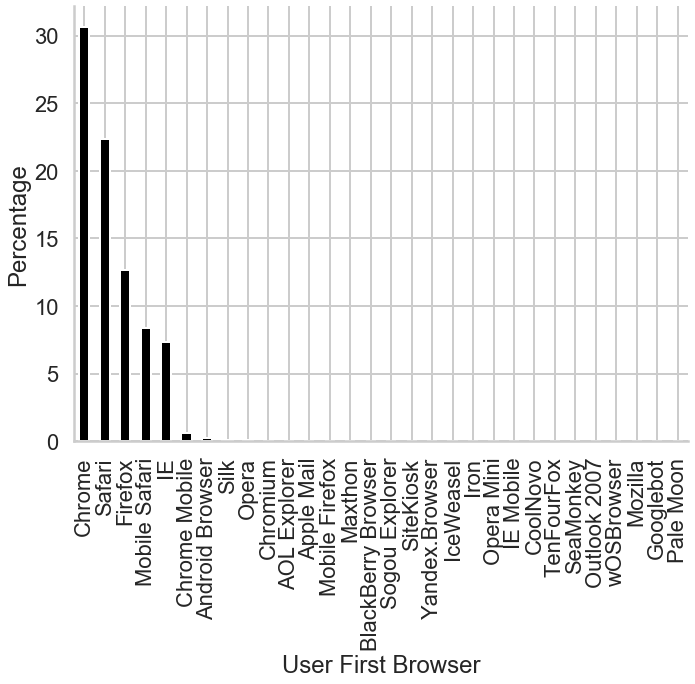

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
first_browser_percentage = dfmergefinal.first_browser.value_counts() / dfmergefinal.shape[0] * 100
first_browser_percentage.plot(kind='bar',color='black')
plt.xlabel('User First Browser')
plt.ylabel('Percentage')
print(first_browser_percentage)
sns.despine()

__INTERPRETATION:__ 74% of the users used one of Chrome, Safari, Firefox, and Mobile Safari as the browser.

__Q8:__ __What are the most common actions while booking?__

show                     21.513067
search_results            9.155315
personalize               9.108016
index                     7.955459
ajax_refresh_subtotal     6.272261
similar_listings          5.726951
lookup                    3.763644
update                    3.721524
search                    3.275392
social_connections        2.382288
Name: action, dtype: float64


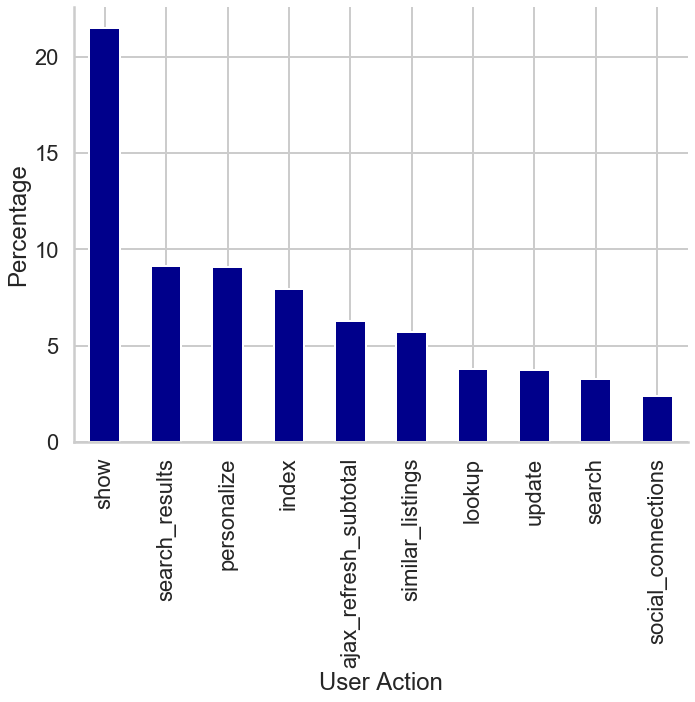

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
action_percentage = dfmergefinal.action.value_counts().head(10) / dfmergefinal.shape[0] * 100
action_percentage.plot(kind='bar',color='#00008b')
plt.xlabel('User Action')
plt.ylabel('Percentage')
print(action_percentage.head(10))
sns.despine()

__INTERPRETATION:__ 21.5% of users apply "show" action. I can see that users did "show" action after doing other actions. Therefore, there can be said that "show" is the result of any other actions.

__Q9:__ __What days of a week do users mostly become active for booking a stay?__

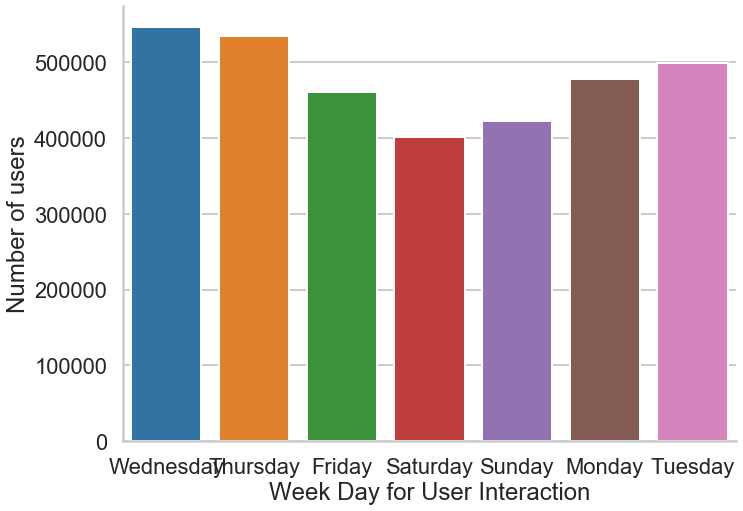

In [14]:
dfmergefinal['date_account_created_converted'] = pd.to_datetime(dfmergefinal['date_account_created'])
dfmergefinal['date_first_active_converted'] = pd.to_datetime((dfmergefinal.timestamp_first_active // 1000000), format='%Y%m%d')
dfmergefinal['date_account_created_day'] = dfmergefinal.date_account_created_converted.dt.weekday_name
dfmergefinal['date_account_created_month'] = dfmergefinal.date_account_created_converted.dt.month
dfmergefinal['date_account_created_year'] = dfmergefinal.date_account_created_converted.dt.year
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.countplot(x='date_account_created_day',data=dfmergefinal)
plt.xlabel('Week Day for User Interaction')
plt.ylabel('Number of users')
sns.despine()

__INTERPRETATION:__ As seen on the graph above, users are mostly more active on Wednesdays and Thursdays and less active on weekends. Then, we can say that users will more probably book on weekdays than weekends. 

__Q10:__ __What are the most common applications that users mostly use to signup based on destination countries?__

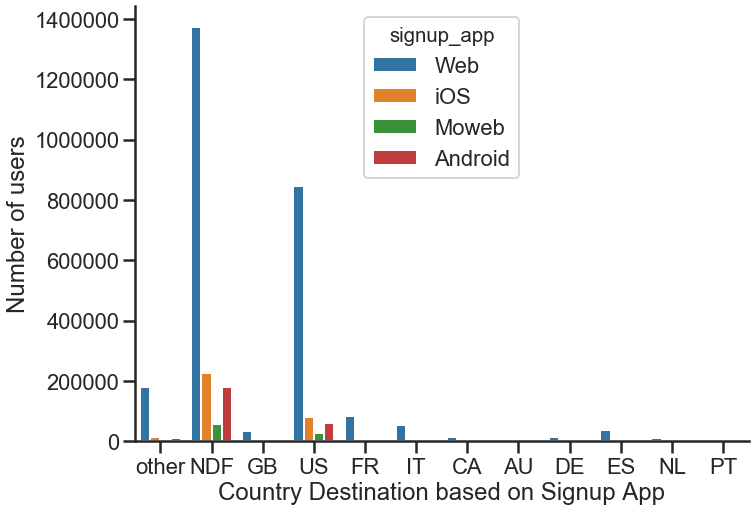

In [15]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.countplot(x='country_destination', hue='signup_app',data=dfmergefinal)
plt.xlabel('Country Destination based on Signup App')
plt.ylabel('Number of users')
sns.despine()

Among non-defined countries and US, web is the mostly-used signup method while the Moweb is the least one. As you might remember, we had some other apps as well, which are not even listed here because they don't make too much impact.I am going to do one more thing with this data to check other countries except NDF.

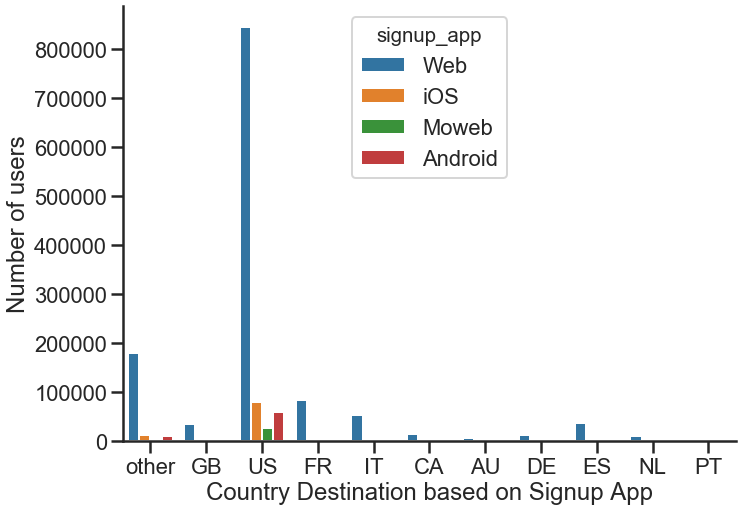

In [16]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
countries_without_NDF= dfmergefinal[dfmergefinal['country_destination']!='NDF']
sns.countplot(x='country_destination', hue='signup_app',data=countries_without_NDF)
plt.xlabel('Country Destination based on Signup App')
plt.ylabel('Number of users')
sns.despine()

__INTERPRETATION:__ I have the same results here. So, Web is the most preferred signup app for booking a stay.

__Q11:__ __What is the most common signup method that users mostly use to signup based on destination countries?__

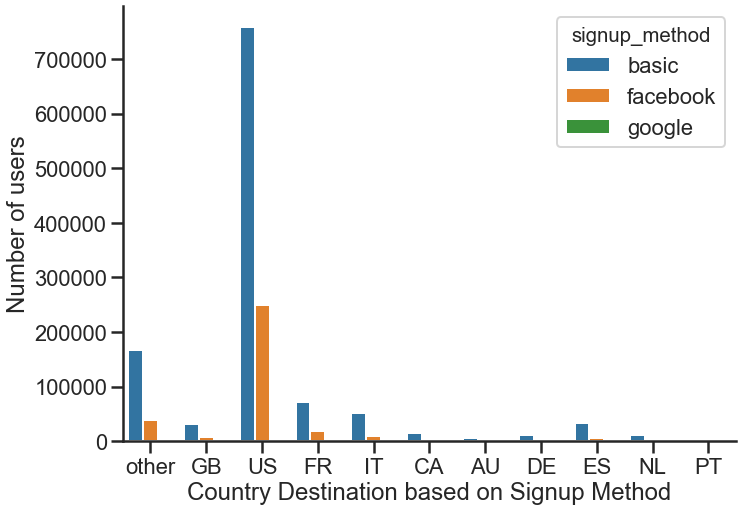

In [18]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
data_without_NDF= dfmergefinal[dfmergefinal['country_destination']!='NDF']
sns.countplot(x='country_destination', hue='signup_method',data=data_without_NDF)
plt.xlabel('Country Destination based on Signup Method')
plt.ylabel('Number of users')
sns.despine()

__INTERPRETATION:__ In all countries, a basic signup method is the most preferred method. Here, I directly eliminated NDF values. 

__12:__ __What is relationship between users' ages and destination countries?__

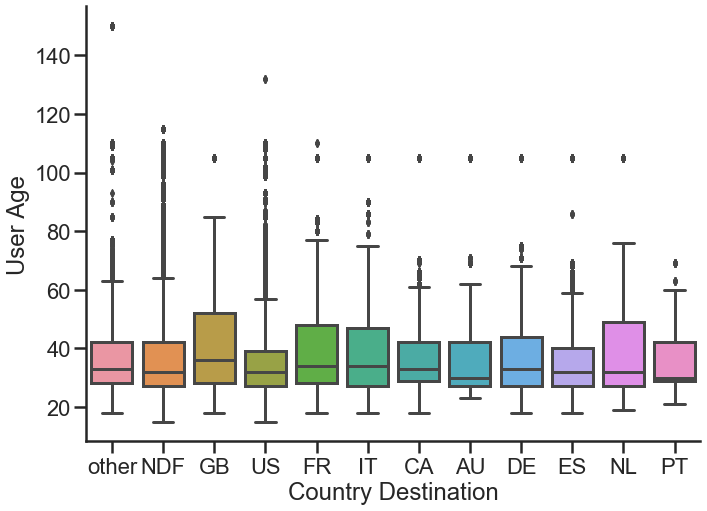

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
sns.boxplot(y='age' , x='country_destination',data=dfmergefinal)
plt.xlabel('Country Destination')
plt.ylabel('User Age')
sns.despine()


Before intepreting the results, I want to write the same code without NDF.

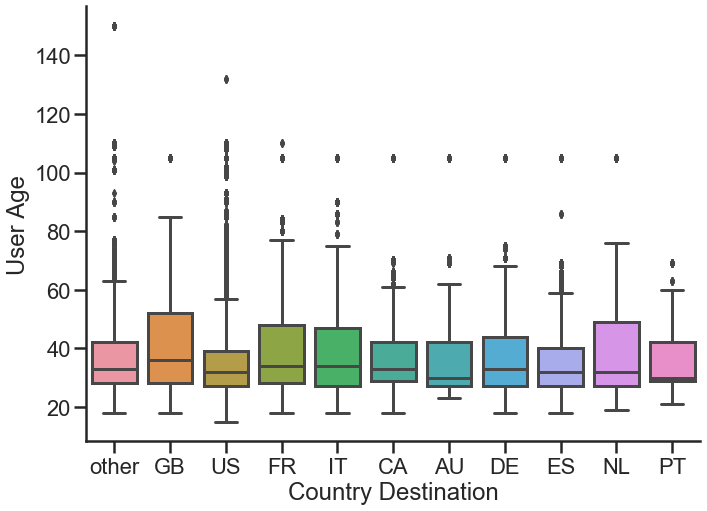

In [20]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
dfmergefinal_without_NDF= dfmergefinal[dfmergefinal['country_destination']!='NDF']
sns.boxplot(y='age' , x='country_destination',data=dfmergefinal_without_NDF)
plt.xlabel('Country Destination')
plt.ylabel('User Age')
sns.despine()

__INTERPRETATION:__ As seen in the boxplot above, medians are very close to each other for all destination contries. Users who are booking a stay in the US are the youngest ones compare to other countries. Also, users who are booking their stays in Great Britain, France, Italy and Netherland tend to be older. Users for Canada and Australia also tend to be younger. 

__Q13:__ __What days of a week that users mostly prefer for booking based on destination countries?__

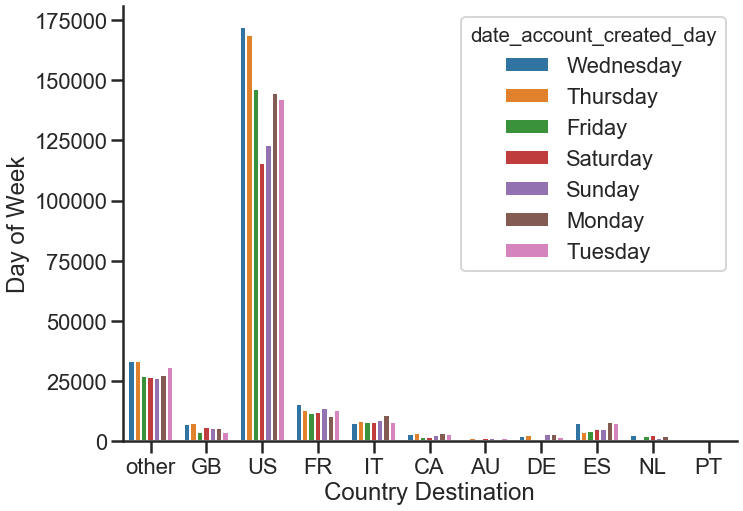

In [24]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
dfmergefinal_without_NDF= dfmergefinal[dfmergefinal['country_destination']!='NDF']
sns.countplot(x='country_destination', hue='date_account_created_day',data=countries_without_NDF)
plt.xlabel('Country Destination')
plt.ylabel('Day of Week')
sns.despine()

__INTERPRETATION:__ As seen in the countplot above, users who want to book a stay in the US are mostly active on Wednesdays and Thursdays while less active on weekends. I want to look at the results one more time without US because it seems there might some interesting results for outher destination countries.

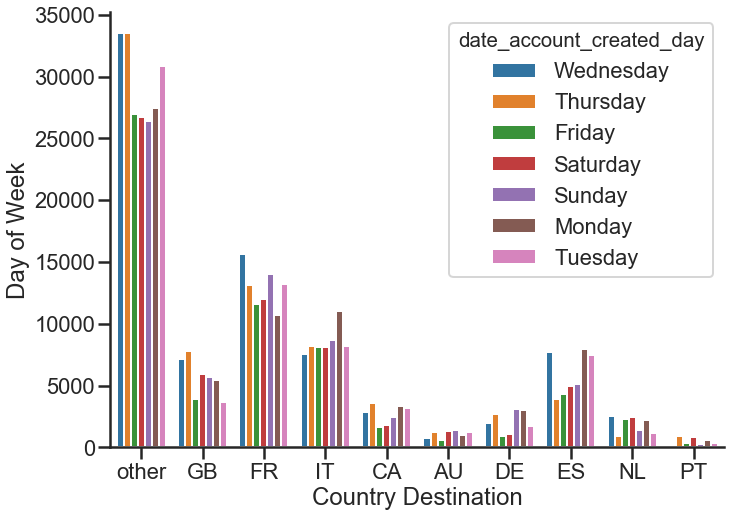

In [26]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)
dfmergefinal_without_NDF= dfmergefinal[dfmergefinal['country_destination']!='NDF']
dfmergefinal_without_US= dfmergefinal_without_NDF[dfmergefinal_without_NDF['country_destination']!='US']
sns.countplot(x='country_destination', hue='date_account_created_day',data=dfmergefinal_without_US)
plt.xlabel('Country Destination')
plt.ylabel('Day of Week')
sns.despine()

__INTERPRETATION:__ Yes, there are some interesting results here. When users select France as their destination country, they become less active on Monday and Friday while more active Wednesday and Sunday. They are less active on Friday for Great Britain as well. Users try to book a stay mostly on Monday for Italy and Spain. For the countries like Netherland and Portugal, they prefer Saturday. 